In [2]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sqlalchemy import create_engine

In [3]:
file = "Resources/whr2021.csv"
file2 = "Resources/whrold.csv"

In [4]:
WHR = pd.read_csv(file)
print(len(WHR))
WHR.head(10)


149


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


In [5]:
WHR = WHR.dropna()
print(len(WHR))
WHR.head()

149


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [6]:
newindex = WHR.set_index("Country name")
newindex.head()

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [7]:
newindex["Residual X"] = ((newindex["Dystopia + residual"]) - (newindex["Ladder score in Dystopia"]))
newindex.head()

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Residual X
Country name,,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,0.823
Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,0.438
Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,0.409
Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,0.537
Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,0.368


In [9]:
renamed_df = newindex.reset_index()
renamed_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Residual X
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,0.823
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,0.438
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,0.409
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,0.537
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,0.368


In [10]:
renamed_df = renamed_df.rename(columns={"Country name": "Country_name", "Regional indicator": "Regional_indicator", "Ladder score": "Ladder_score", "Standard error of ladder score": "Standard_error_of_ladder_score", 'Logged GDP per capita': 'Logged_GDP_per_capita',
       'Social support': 'Social_support', 'Healthy life expectancy': 'Healthy_life_expectancy' ,
       'Freedom to make life choices':'Freedom_to_make_life_choices',
       'Perceptions of corruption': 'Perceptions_of_corruption', 'Ladder score in Dystopia': 'Ladder_score_in_Dystopia',
       'Explained by: Log GDP per capita': 'Explained_by_Log_GDP_per_capita', 'Explained by: Social support': 'Explained_by_Social_support',
       'Explained by: Healthy life expectancy': 'Explained_by_Healthy_life_expectancy',
       'Explained by: Freedom to make life choices': 'Explained_by_Freedom_to_make_life_choices',
       'Explained by: Generosity': 'Explained_by_Generosity', 'Explained by: Perceptions of corruption': 'Explained_by_Perceptions_of_corruption',
       'Dystopia + residual': 'Dystopia_residual', 'Residual X': 'Residual_X'})

renamed_df.head()

,Country_name,Regional_indicator,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,...,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by_Log_GDP_per_capita,Explained_by_Social_support,Explained_by_Healthy_life_expectancy,Explained_by_Freedom_to_make_life_choices,Explained_by_Generosity,Explained_by_Perceptions_of_corruption,Dystopia_residual,Residual_X
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,...,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253,0.823
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,...,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868,0.438
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,...,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839,0.409
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,...,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967,0.537
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,...,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798,0.368


In [18]:
correlation_df = renamed_df.drop(columns =["Country_name", "Regional_indicator", "Standard_error_of_ladder_score", "upperwhisker", "lowerwhisker", "Logged_GDP_per_capita", "Social_support", "Healthy_life_expectancy", "Freedom_to_make_life_choices", "Perceptions_of_corruption", "Ladder_score_in_Dystopia", "Residual_X"])
correlation_df.head()

,Ladder_score,Generosity,Explained_by_Log_GDP_per_capita,Explained_by_Social_support,Explained_by_Healthy_life_expectancy,Explained_by_Freedom_to_make_life_choices,Explained_by_Generosity,Explained_by_Perceptions_of_corruption,Dystopia_residual
0,7.842,-0.098,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,7.620,0.030,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,7.571,0.025,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,7.554,0.160,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,7.464,0.175,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [27]:
from matplotlib.pyplot import figure




In [32]:
# def plot_corr(df,size=10):
# #     '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

# #     Input:
# #         df: pandas DataFrame
# #         size: vertical and horizontal size of the plot'''

#     corr = correlation_df.corr()
#     fig, ax = plt.subplots(figsize=(size, size))
#     ax.matshow(corr)
#     plt.xticks(range(len(corr.columns)), corr.columns);
#     plt.yticks(range(len(corr.columns)), corr.columns);
    
#     return plot_corr

<IPython.core.display.Javascript object>


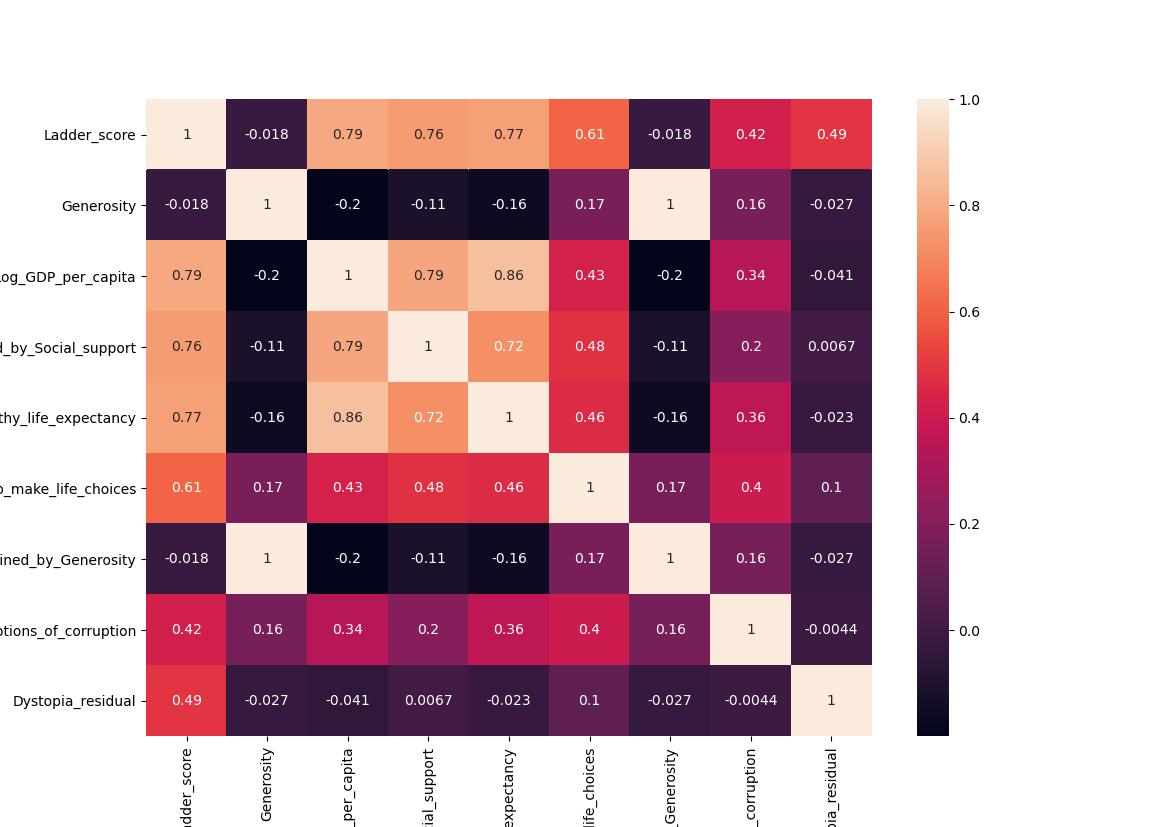

In [33]:
corr = correlation_df.corr()
# print(corrMatrix)
sn.heatmap(corrMatrix, annot=True)
# figure size in inches

plt.show()

In [ ]:
# engine = create_engine("sqlite:///SQLProject2.db")


# renamed_df.to_sql("WHR2021", con=engine, index=False, if_exists='append')